In [1]:
import sys
sys.path.insert(0, 'pipeline_code')
from mixed_data import create_pipeline
from cross_validation import Stratified10KFoldValidation

In [2]:
import pandas as pd

data = pd.read_csv("dataset/X_data.csv").drop(columns=["Unnamed: 0"])
labels = pd.read_csv("dataset/y_data.csv").Status

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Drug           312 non-null    object 
 2   Age            418 non-null    float64
 3   Sex            418 non-null    object 
 4   Ascites        312 non-null    object 
 5   Hepatomegaly   312 non-null    object 
 6   Spiders        312 non-null    object 
 7   Edema          418 non-null    object 
 8   Bilirubin      418 non-null    float64
 9   Cholesterol    284 non-null    float64
 10  Albumin        418 non-null    float64
 11  Copper         310 non-null    float64
 12  Alk_Phos       312 non-null    float64
 13  SGOT           312 non-null    float64
 14  Tryglicerides  282 non-null    float64
 15  Platelets      407 non-null    float64
 16  Prothrombin    416 non-null    float64
 17  Stage          412 non-null    float64
dtypes: float64

In [3]:
numeric_features = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                   'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
categorical_features = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Stage"]
ordinal_columns = {
    'cat__Ascites': ['N', 'Y'],
    'cat__Hepatomegaly': ['N', 'Y'],
    'cat__Spiders': ['N', 'Y'],
    'cat__Edema': ['N', 'S', 'Y'],
    'cat__Stage': ['1.0', '2.0', '3.0', '4.0']
}

In [4]:
param_grid_RandomForest = {
    "preprocessing__num__imputer__n_neighbors": range(3, 10),

    "feature_selector__k": range(1, 19),

    "oversampler__k_neighbors": range(3, 10, 2),
    "oversampler__borderline": [True, False],
    "undersampler__k_neighbors": range(3, 10, 2),
    
    "model__estimator__max_depth": range(2, 8),
    "model__estimator__criterion": ["gini", "entropy"],
}

param_grid_KNNeighbor = {
    "preprocessing__num__imputer__n_neighbors": range(3, 10),

    "feature_selector__k": range(1, 19),
    
    "oversampler__k_neighbors": range(3, 10, 2),
    "oversampler__borderline": [True, False],
    "undersampler__k_neighbors": range(3, 10, 2),
    
    "model__n_neighbors": range(3, 18, 2),
}

param_grid_AdaBoostGNB = {
    "preprocessing__num__imputer__n_neighbors": range(3, 10),

    "feature_selector__k": range(1, 19),
    
    "oversampler__k_neighbors": range(3, 10, 2),
    "oversampler__borderline": [True, False],
    "undersampler__k_neighbors": range(3, 10, 2),
    
    "model__learning_rate": [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5],
}

param_grid_NeuralNetwork = {
    "preprocessing__num__imputer__n_neighbors": range(3, 10),

    "feature_selector__k": range(1, 19),
    
    "oversampler__k_neighbors": range(3, 10, 2),
    "oversampler__borderline": [True, False],
    "undersampler__k_neighbors": range(3, 10, 2),
    
    "model__hidden_layer_sizes": [(32,), (32, 32, ), (64,), (64, 64, )],
    "model__activation": ["relu", "logistic"],
    "model__learning_rate": ['adaptive', 'constant']
}

In [5]:
from sklearn.preprocessing import RobustScaler

clf_RandomForest = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        imputers_needed=True,
        scaler=RobustScaler(),
        oversample_needed=True,
        oversampling_strategy={
            "Low chance": False,
            "Transplant needed": True
        },
        undersample_needed=True,
        undersampling_strategy=["High chance"],
        target=labels,
        model="RandomForestClf"
    )

clf_KNNeighbor = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        imputers_needed=True,
        scaler=RobustScaler(),
        oversample_needed=True,
        oversampling_strategy={
            "Low chance": False,
            "Transplant needed": True
        },
        undersample_needed=True,
        undersampling_strategy=["High chance"],
        target=labels,
        model="KNNClf"
    )

clf_AdaBoostGNB = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        imputers_needed=True,
        scaler=RobustScaler(),
        oversample_needed=True,
        oversampling_strategy={
            "Low chance": False,
            "Transplant needed": True
        },
        undersample_needed=True,
        undersampling_strategy=["High chance"],
        target=labels,
        model="AdaBoostGaussianNB"
    )

clf_NeuralNetwork = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        ordinal_columns=ordinal_columns,
        imputers_needed=True,
        scaler=RobustScaler(),
        oversample_needed=True,
        oversampling_strategy={
            "Low chance": False,
            "Transplant needed": True
        },
        undersample_needed=True,
        undersampling_strategy=["High chance"],
        target=labels,
        model="NeuralNetworkClf"
    )

In [6]:
clf_RandomForest

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   CustomKNNImputer(train_labels=0             Low chance
1            High chance
2             Low chance
3             Low chance
4      Transplant needed
             ...        
413           Low chance
414          High chance
415          High chance
416          High chance
417          High chance
Name: Status, Length: 418, dtype: object)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['N_Days', 'Age', 'Bilirubin',
                                                   'C...
                                                   'Hepatomegaly', 'Spiders',
                                                   'Edema', 'Stage'])])),
                ('feature_selector', MutualInfoFeatureSelector()),
                ('oversampler',
                 SMOTE_ENC(sampling_strategy={'Low chance': False,
                                              'Transplant needed': True})),
                ('undersampler',
                 MixedEditedNearestNeighbors(sampling_strategy=['High '
                                                                'chance'])),
                ('model',
                 BaggingClassifier(estimator=MixedDecisionTree(),
                                   n_estimators=30, n_jobs=-1,
                                   random_state=0))])

In [7]:
clf_KNNeighbor

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   CustomKNNImputer(train_labels=0             Low chance
1            High chance
2             Low chance
3             Low chance
4      Transplant needed
             ...        
413           Low chance
414          High chance
415          High chance
416          High chance
417          High chance
Name: Status, Length: 418, dtype: object)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['N_Days', 'Age', 'Bilirubin',
                                                   'C...
Name: Status, Length: 418, dtype: object))]),
                                                  ['Drug', 'Sex', 'Ascites',
                                                   'Hepatomegaly', 'Spiders',
                                                   'Edema', 'Stage'])])),
                ('feature_selector', MutualInfoFeatureSelector()),
                ('oversampler',
                 SMOTE_ENC(sampling_strategy={'Low chance': False,
                                              'Transplant needed': True})),
                ('undersampler',
                 MixedEditedNearestNeighbors(sampling_strategy=['High '
                                                                'chance'])),
                ('model', MixedKNN())])

In [8]:
clf_AdaBoostGNB

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   CustomKNNImputer(train_labels=0             Low chance
1            High chance
2             Low chance
3             Low chance
4      Transplant needed
             ...        
413           Low chance
414          High chance
415          High chance
416          High chance
417          High chance
Name: Status, Length: 418, dtype: object)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['N_Days', 'Age', 'Bilirubin',
                                                   'C...
                                                   'Hepatomegaly', 'Spiders',
                                                   'Edema', 'Stage'])])),
                ('feature_selector', MutualInfoFeatureSelector()),
                ('oversampler',
                 SMOTE_ENC(sampling_strategy={'Low chance': False,
                                              'Transplant needed': True})),
                ('undersampler',
                 MixedEditedNearestNeighbors(sampling_strategy=['High '
                                                                'chance'])),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME',
                                    estimator=MixedGaussianNB(),
                                    n_estimators=30, random_state=0))])

In [9]:
clf_NeuralNetwork

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   CustomKNNImputer(train_labels=0             Low chance
1            High chance
2             Low chance
3             Low chance
4      Transplant needed
             ...        
413           Low chance
414          High chance
415          High chance
416          High chance
417          High chance
Name: Status, Length: 418, dtype: object)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['N_Days', 'Age', 'Bilirubin',
                                                   'C...
                 SMOTE_ENC(sampling_strategy={'Low chance': False,
                                              'Transplant needed': True})),
                ('undersampler',
                 MixedEditedNearestNeighbors(sampling_strategy=['High '
                                                                'chance'])),
                ('encoder',
                 DynamicColumnEncoder(ordinal_columns={'cat__Ascites': ['N',
                                                                        'Y'],
                                                       'cat__Edema': ['N', 'S',
                                                                      'Y'],
                                                       'cat__Hepatomegaly': ['N',
                                                                             'Y'],
                                                       'cat__Spiders': ['N',
                                                                        'Y'],
                                                       'cat__Stage': ['1.0',
                                                                      '2.0',
                                                                      '3.0',
                                                                      '4.0']})),
                ('model', MLPClassifier(random_state=0))])

In [10]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [11]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
scorer = "f1_macro"

                   precision    recall  f1-score   support

      High chance       0.88      1.00      0.94        23
       Low chance       1.00      0.65      0.79        17
Transplant needed       0.40      1.00      0.57         2

         accuracy                           0.86        42
        macro avg       0.76      0.88      0.77        42
     weighted avg       0.91      0.86      0.86        42

                   precision    recall  f1-score   support

      High chance       0.88      0.96      0.92        24
       Low chance       1.00      0.75      0.86        16
Transplant needed       0.50      1.00      0.67         2

         accuracy                           0.88        42
        macro avg       0.79      0.90      0.81        42
     weighted avg       0.91      0.88      0.88        42

                   precision    recall  f1-score   support

      High chance       0.96      0.96      0.96        24
       Low chance       1.00      0.88      0.93 

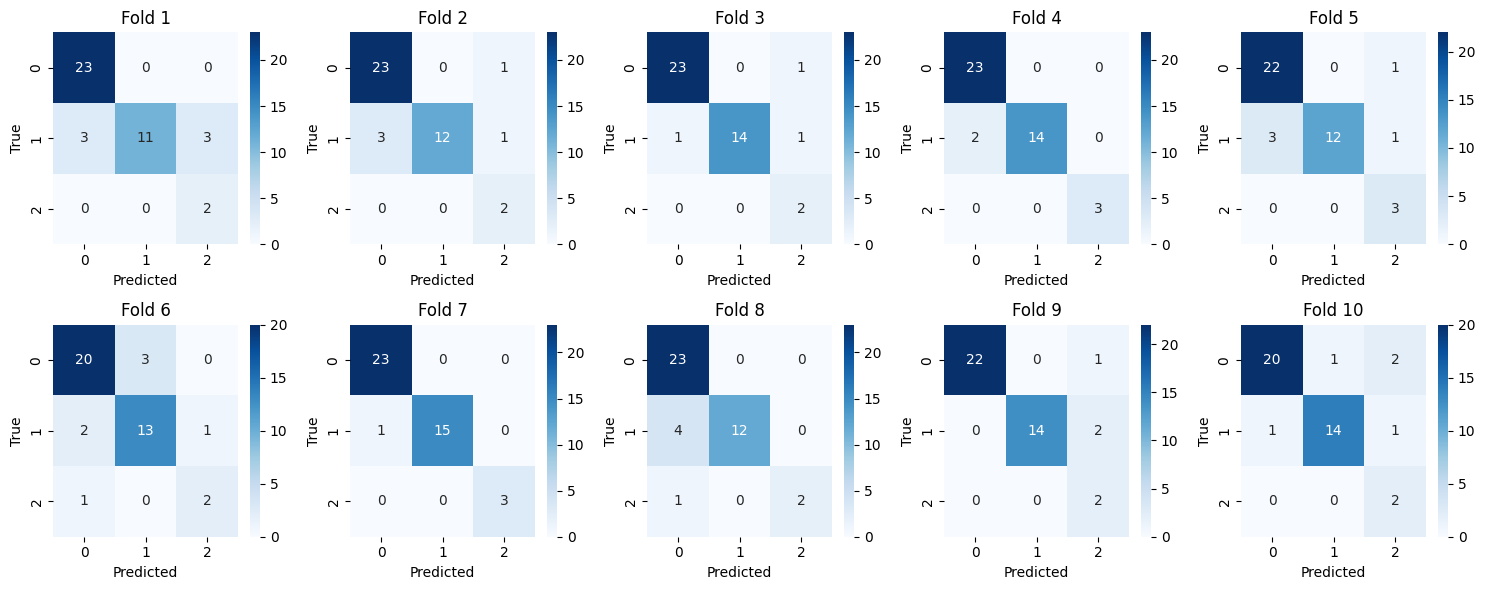

Model best parameters: {'undersampler__k_neighbors': 9, 'preprocessing__num__imputer__n_neighbors': 8, 'oversampler__k_neighbors': 5, 'oversampler__borderline': False, 'model__estimator__max_depth': 5, 'model__estimator__criterion': 'gini', 'feature_selector__k': 12}


In [12]:
f_macro_scores1 = []
clfRF, best_params, reports = \
    Stratified10KFoldValidation(clf_RandomForest, param_grid_RandomForest, data, labels, scorer, skf)
print("Model best parameters:", best_params)
for report in reports:
    f_macro_scores1.append(report["macro avg"]["f1-score"])

                   precision    recall  f1-score   support

      High chance       0.90      0.83      0.86        23
       Low chance       1.00      0.59      0.74        17
Transplant needed       0.18      1.00      0.31         2

         accuracy                           0.74        42
        macro avg       0.70      0.80      0.64        42
     weighted avg       0.91      0.74      0.79        42

                   precision    recall  f1-score   support

      High chance       0.80      0.83      0.82        24
       Low chance       0.89      0.50      0.64        16
Transplant needed       0.25      1.00      0.40         2

         accuracy                           0.71        42
        macro avg       0.65      0.78      0.62        42
     weighted avg       0.81      0.71      0.73        42

                   precision    recall  f1-score   support

      High chance       0.91      0.88      0.89        24
       Low chance       0.86      0.75      0.80 

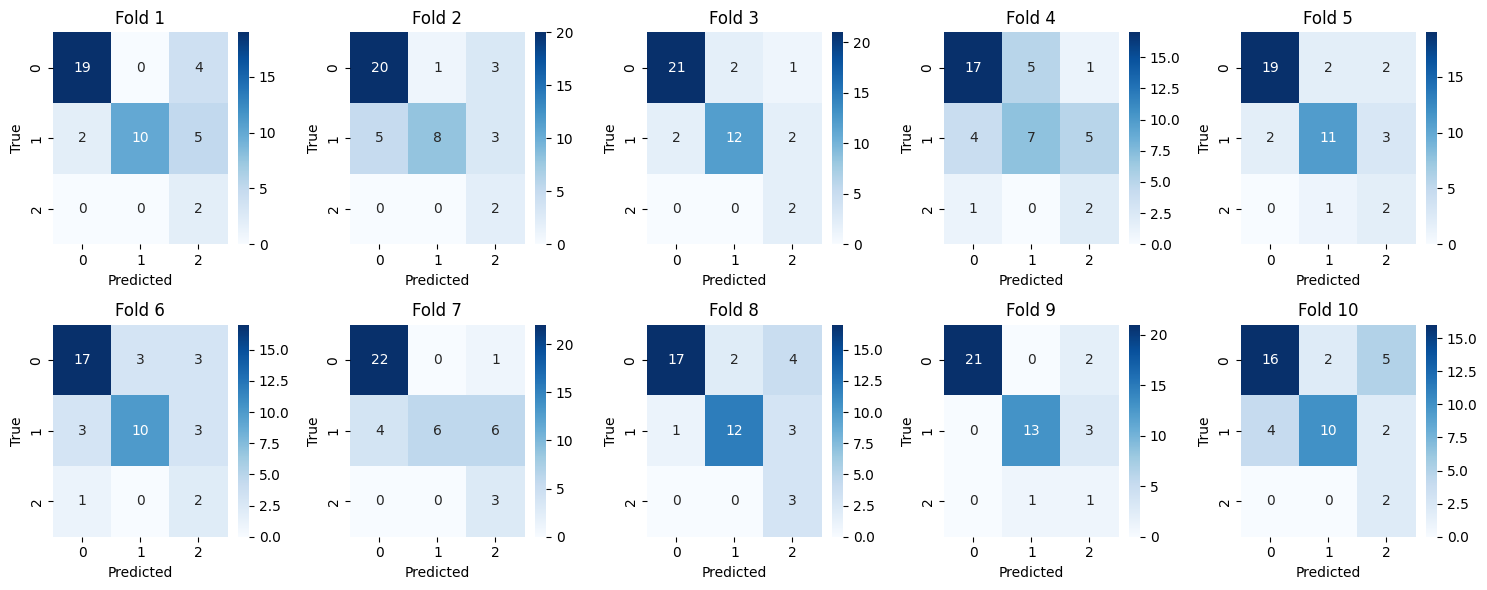

Model best parameters: {'undersampler__k_neighbors': 3, 'preprocessing__num__imputer__n_neighbors': 8, 'oversampler__k_neighbors': 5, 'oversampler__borderline': False, 'model__n_neighbors': 17, 'feature_selector__k': 11}


In [13]:
f_macro_scores2 = []
clfKNN, best_params, reports = \
    Stratified10KFoldValidation(clf_KNNeighbor, param_grid_KNNeighbor, data, labels, scorer, skf)
print("Model best parameters:", best_params)
for report in reports:
    f_macro_scores2.append(report["macro avg"]["f1-score"])

                   precision    recall  f1-score   support

      High chance       0.86      0.83      0.84        23
       Low chance       0.83      0.59      0.69        17
Transplant needed       0.25      1.00      0.40         2

         accuracy                           0.74        42
        macro avg       0.65      0.80      0.64        42
     weighted avg       0.82      0.74      0.76        42

                   precision    recall  f1-score   support

      High chance       0.69      0.75      0.72        24
       Low chance       0.75      0.56      0.64        16
Transplant needed       0.25      0.50      0.33         2

         accuracy                           0.67        42
        macro avg       0.56      0.60      0.57        42
     weighted avg       0.69      0.67      0.67        42

                   precision    recall  f1-score   support

      High chance       0.78      0.75      0.77        24
       Low chance       0.71      0.62      0.67 

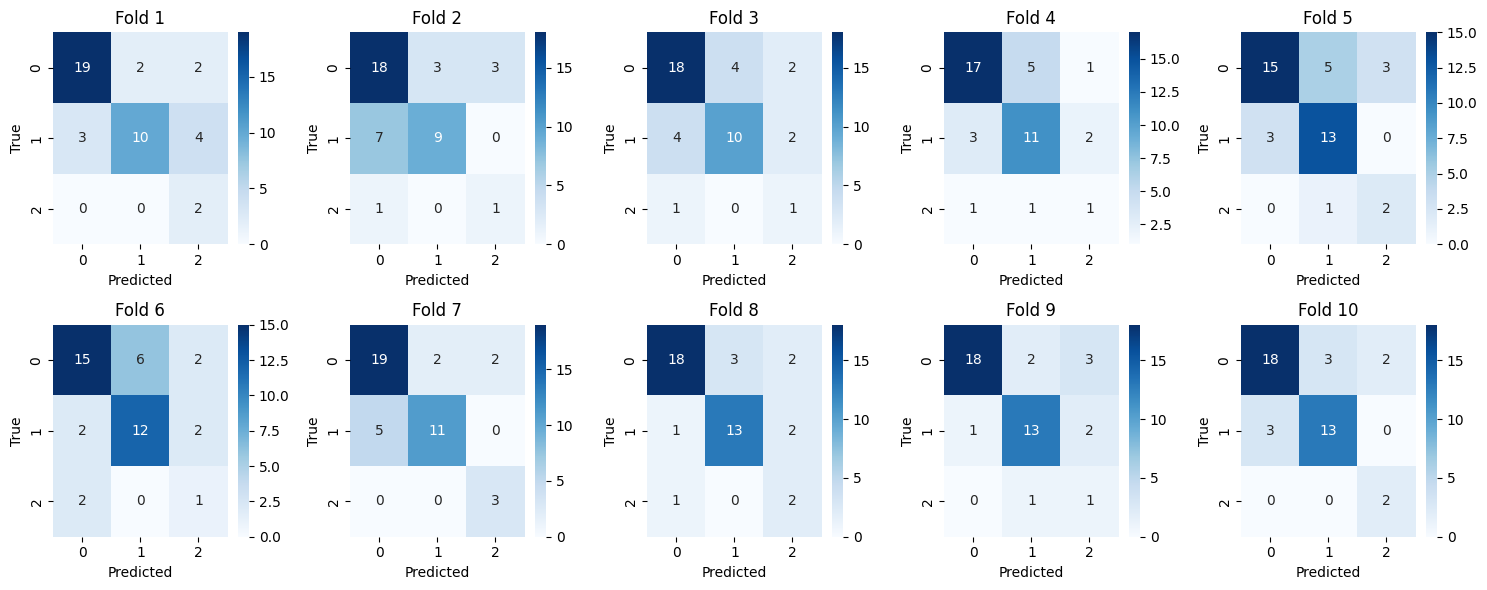

Model best parameters: {'undersampler__k_neighbors': 3, 'preprocessing__num__imputer__n_neighbors': 8, 'oversampler__k_neighbors': 5, 'oversampler__borderline': False, 'model__learning_rate': 1.5, 'feature_selector__k': 11}


In [14]:
f_macro_scores3 = []
clfADAGNB, best_params, reports = \
    Stratified10KFoldValidation(clf_AdaBoostGNB, param_grid_AdaBoostGNB, data, labels, scorer, skf)
print("Model best parameters:", best_params)
for report in reports:
    f_macro_scores3.append(report["macro avg"]["f1-score"])

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                   precision    recall  f1-score   support

      High chance       0.86      0.78      0.82        23
       Low chance       0.75      0.53      0.62        17
Transplant needed       0.22      1.00      0.36         2

         accuracy                           0.69        42
        macro avg       0.61      0.77      0.60        42
     weighted avg       0.78      0.69      0.72        42

                   precision    recall  f1-score   support

      High chance       0.81      0.92      0.86        24
       Low chance       0.92      0.75      0.83        16
Transplant needed       0.50      0.50      0.50         2

         accuracy                           0.83        42
        macro avg       0.75      0.72      0.73        42
     weighted avg       0.84      0.83      0.83        42

                   precision    recall  f1-score   support

      High chance       0.92      0.92      0.92        24
       Low chance       0.86      0.75      0.80 

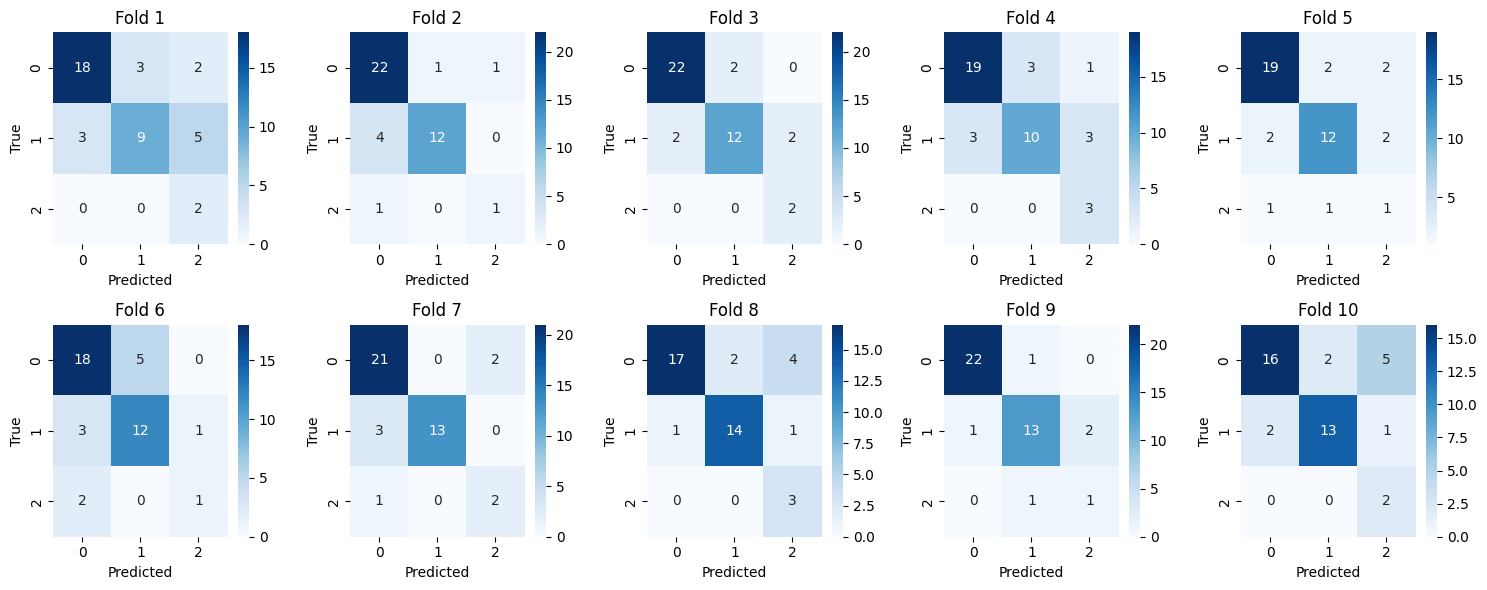

Model best parameters: {'undersampler__k_neighbors': 5, 'preprocessing__num__imputer__n_neighbors': 9, 'oversampler__k_neighbors': 5, 'oversampler__borderline': True, 'model__learning_rate': 'adaptive', 'model__hidden_layer_sizes': (64, 64), 'model__activation': 'logistic', 'feature_selector__k': 12}


In [15]:
f_macro_scores4 = []
clfNN, best_params, reports = \
    Stratified10KFoldValidation(clf_NeuralNetwork, param_grid_NeuralNetwork, data, labels, scorer, skf)
print("Model best parameters:", best_params)
for report in reports:
    f_macro_scores4.append(report["macro avg"]["f1-score"])

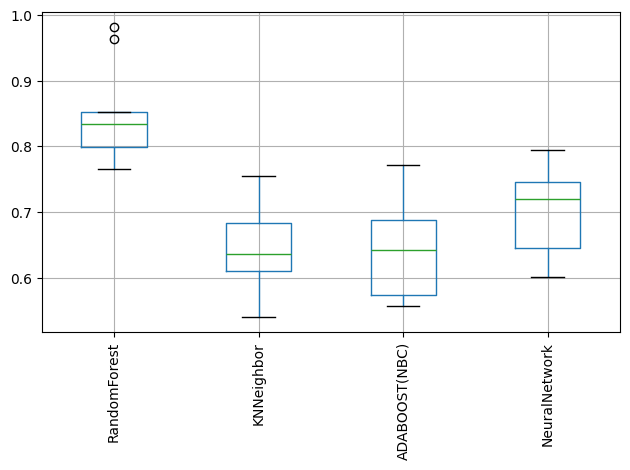

In [16]:
cv_scores = {
    'RandomForest': f_macro_scores1,
    'KNNeighbor': f_macro_scores2,
    'ADABOOST(NBC)': f_macro_scores3,
    'NeuralNetwork': f_macro_scores4
}

df_cv_scores = pd.DataFrame(cv_scores)

df_cv_scores.boxplot()
plt.xticks(ticks=range(1, len(df_cv_scores.columns) + 1), labels=df_cv_scores.columns, rotation=90)
plt.tight_layout()
plt.show()

c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


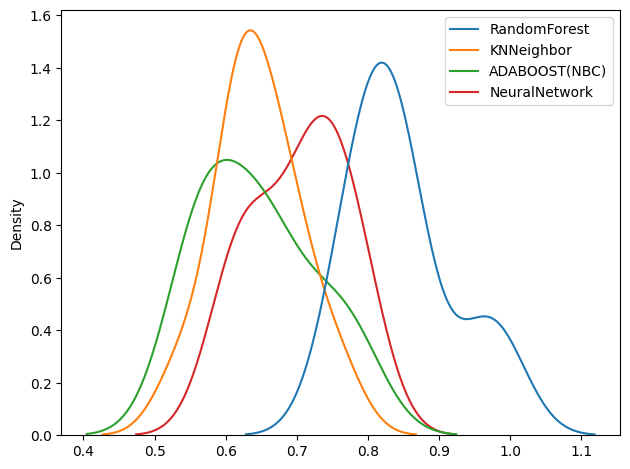

In [17]:
import scipy.stats as stats
import seaborn as sns

sns.kdeplot(data=df_cv_scores)
plt.tight_layout()
plt.show()

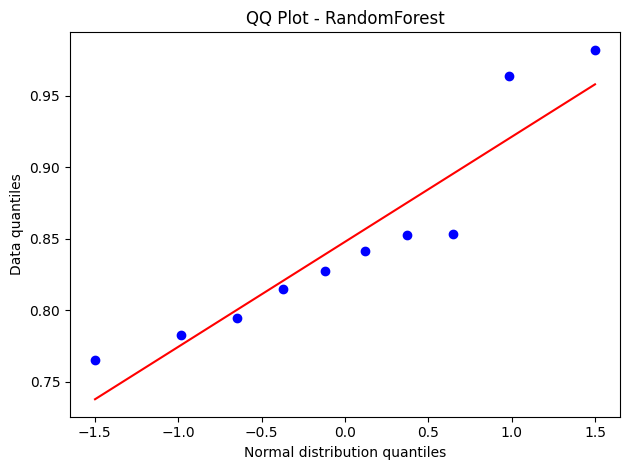

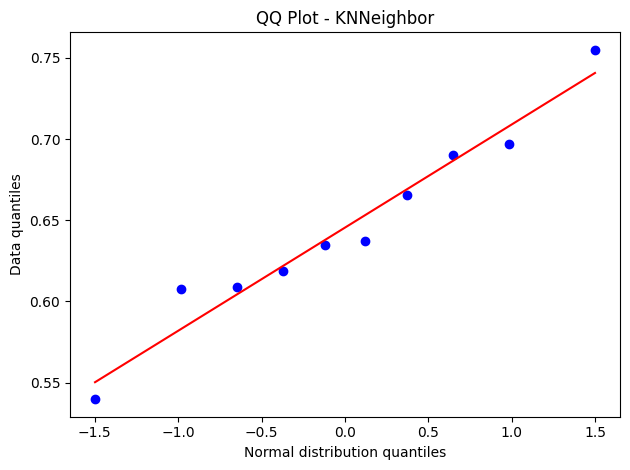

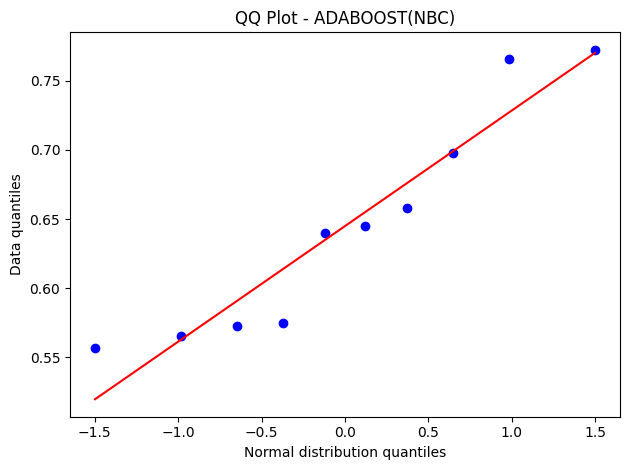

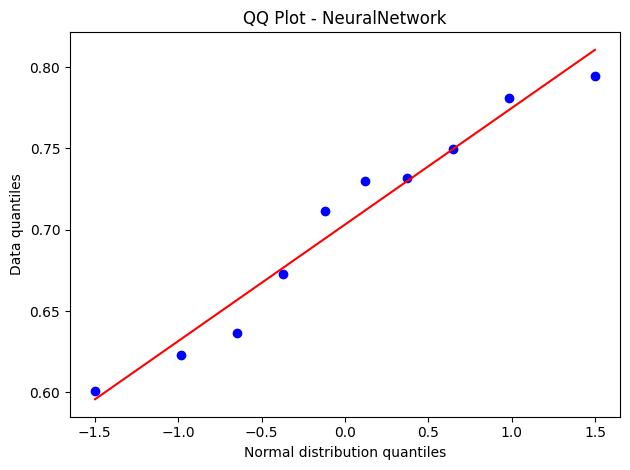

In [18]:
for i, col in enumerate(df_cv_scores.columns):
    stats.probplot(df_cv_scores[col], plot=plt)
    plt.title(f'QQ Plot - {col}')
    plt.xlabel('Normal distribution quantiles')
    plt.ylabel('Data quantiles')
    plt.tight_layout()

    plt.show()

In [19]:
statistic, p_value = stats.levene(cv_scores["RandomForest"], 
                                 cv_scores["KNNeighbor"], 
                                 cv_scores["ADABOOST(NBC)"],
                                 cv_scores["NeuralNetwork"])

print("Levene's statistic:", statistic)
print("p value:", p_value)

if p_value < 0.05:
    print("There is evidence to reject the null hypothesis of equal variances.")
else:
    print("There is no evidence to reject the null hypothesis of equal variances.")

Levene's statistic: 0.3345409486210277
p value: 0.8004176795500553
There is no evidence to reject the null hypothesis of equal variances.


In [20]:
from scipy.stats import kruskal
from itertools import combinations
from scipy.stats import wilcoxon

kruskal_result = kruskal(cv_scores["RandomForest"], 
                         cv_scores["KNNeighbor"], 
                         cv_scores["ADABOOST(NBC)"],
                         cv_scores["NeuralNetwork"])

print("Kruskal-Wallis statistic:", kruskal_result.statistic)
print("p value:", kruskal_result.pvalue)

if kruskal_result.pvalue < 0.05:
    print("There is a statistically relevant difference between at least two groups.")
    models = ["RandomForest", "KNNeighbor", "ADABOOST(NBC)", "NeuralNetwork"]
    couples = list(combinations(models, 2))
    
    for _ in couples:
        m1, m2 = _
        wilcoxon_result = wilcoxon(cv_scores[m1], cv_scores[m2])
        
        print("Comparing", m1, "and", m2)
        print("Wilcoxon statistic:", wilcoxon_result.statistic)
        print("p value:", wilcoxon_result.pvalue)
        
        if wilcoxon_result.pvalue < 0.05:
            print("There is a statistically relevant difference between", m1, "and", m2)
        else:
            print("There is no statistically relevant difference between", m1, "and", m2)
        print("----")
else:
    print("There are no statistically relevant difference between groups.")

Kruskal-Wallis statistic: 22.780975609756126
p value: 4.485831149755783e-05
There is a statistically relevant difference between at least two groups.
Comparing RandomForest and KNNeighbor
Wilcoxon statistic: 0.0
p value: 0.001953125
There is a statistically relevant difference between RandomForest and KNNeighbor
----
Comparing RandomForest and ADABOOST(NBC)
Wilcoxon statistic: 0.0
p value: 0.001953125
There is a statistically relevant difference between RandomForest and ADABOOST(NBC)
----
Comparing RandomForest and NeuralNetwork
Wilcoxon statistic: 0.0
p value: 0.001953125
There is a statistically relevant difference between RandomForest and NeuralNetwork
----
Comparing KNNeighbor and ADABOOST(NBC)
Wilcoxon statistic: 24.0
p value: 0.76953125
There is no statistically relevant difference between KNNeighbor and ADABOOST(NBC)
----
Comparing KNNeighbor and NeuralNetwork
Wilcoxon statistic: 7.0
p value: 0.037109375
There is a statistically relevant difference between KNNeighbor and NeuralN